In [ ]:
from pathlib import Path
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [31]:
here = Path.cwd()
root = next(p for p in [here, *here.parents] if (p / "data" / "processed").exists())

#creating 2 columns to identify source file and if ios or android
df_v2 = pd.read_csv(root / "data" / "processed" / "merged" / "state1_clean.csv", header=0)
df_v2.head()

,is_ios,source_file,eventType,eventSampleSpeed,eventDurationSeconds,eventMilesDriven,eventSensorDetectionMthd,eventGPSSignalStrength,eventStartSpeed,eventEndSpeed,memsMedianHorizontalNorm,gyro_angular_change_per_second,gyroAngleChange,mems_radius
0,0,android_turns.csv,4.0,10.394929,7.244125,0.016991,2.0,1.480796,17.323687,6.789408,1.046972,9.521707,69.319600,22.941639
1,0,android_turns.csv,4.0,9.401910,7.497719,0.016103,2.0,1.693853,6.197542,10.101060,1.153392,11.245602,84.723694,20.737572
2,0,android_turns.csv,5.0,11.290954,4.244563,0.008359,2.0,21.173470,11.229438,9.081976,5.708309,24.616348,105.462135,18.996666
3,0,android_turns.csv,5.0,12.743101,3.173500,0.007654,1.0,15.306123,10.714942,13.421639,3.099853,17.929585,57.610783,23.959110
4,0,android_turns.csv,5.0,8.986107,5.990321,0.013587,0.0,19.387754,2.729067,20.937756,1.197121,2.787075,16.806042,91.713660


In [32]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53944 entries, 0 to 53943
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_ios                          53944 non-null  int64  
 1   source_file                     53944 non-null  object 
 2   eventType                       53944 non-null  float64
 3   eventSampleSpeed                53944 non-null  float64
 4   eventDurationSeconds            53944 non-null  float64
 5   eventMilesDriven                53944 non-null  float64
 6   eventSensorDetectionMthd        53944 non-null  float64
 7   eventGPSSignalStrength          53944 non-null  float64
 8   eventStartSpeed                 53944 non-null  float64
 9   eventEndSpeed                   53944 non-null  float64
 10  memsMedianHorizontalNorm        53944 non-null  float64
 11  gyro_angular_change_per_second  53944 non-null  float64
 12  gyroAngleChange                 

In [33]:
df_v2.drop(columns=['source_file'], inplace=True)

In [34]:
scaler =StandardScaler()

features =scaler.fit(df_v2)
features =features.transform(df_v2)

# Convert to pandas Dataframe
scaled_df =pd.DataFrame(features,columns=df_v2.columns)
# Print the scaled data
scaled_df.head(2)
X = scaled_df.values

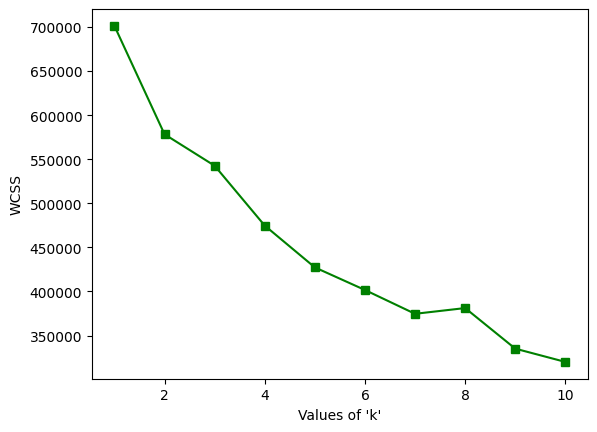

In [35]:
wcss = {} 
for i in range(1, 11): 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss[i] = kmeans.inertia_
    
plt.plot(wcss.keys(), wcss.values(), 'gs-')
plt.xlabel("Values of 'k'")
plt.ylabel('WCSS')
plt.show()

In [ ]:
silhouette_scores = {}
for k in range(1, 11):
    kmeans_model = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels_k = kmeans_model.fit_predict(X)
    if k == 1:
        silhouette_scores[k] = None  # Silhouette score is not defined for k=1
    else:
        silhouette_scores[k] = silhouette_score(X, labels_k)

for k, score in silhouette_scores.items():
    print(f"k={k}: Silhouette Score = {score:.4f}" if score is not None else f"k={k}: Silhouette Score = N/A")

k=1: Silhouette Score = N/A
k=2: Silhouette Score = 0.2483
k=3: Silhouette Score = 0.1514
k=4: Silhouette Score = 0.1761
k=5: Silhouette Score = 0.1834
k=6: Silhouette Score = 0.1593
k=7: Silhouette Score = 0.1844
k=8: Silhouette Score = 0.1507
k=9: Silhouette Score = 0.1624
k=10: Silhouette Score = 0.1668


In [51]:
kmeans=KMeans(n_clusters=5)
kmeans.fit(X)
df_v2['cluster'] = kmeans.fit_predict(X)

In [38]:
kmeans.cluster_centers_

array([[ 0.14380814,  0.05981711, -0.4215745 , -0.78706217, -0.50089379,
        -1.2231825 ,  0.03188453, -0.42093926, -0.44449386, -0.03096125,
        -0.45254353, -0.99090876,  0.11502808],
       [ 0.05013532,  0.20006542,  1.58579175,  2.91072341,  3.64084626,
         0.39189606, -0.10203751,  1.49707713,  1.51957639, -0.5245442 ,
        -0.63757316,  1.69247266,  0.52466431],
       [ 0.14380814, -0.08401785, -0.38172686,  0.18732525, -0.17006065,
         0.55548625, -0.02726937, -0.33586052, -0.31529577,  0.03554659,
         0.50606958,  0.54015556, -0.39846976],
       [-6.95370918,  0.03673376, -0.1205459 , -0.03763393, -0.21191208,
         0.0907331 ,  0.10538723, -0.19738207, -0.07240566, -0.17322807,
         0.27517728,  0.15356475, -0.31583722],
       [ 0.14380814,  0.09713732,  1.39368881,  0.08757194,  0.51391717,
         0.23304257,  0.03638161,  1.29189943,  1.25214721,  0.07548499,
        -0.61600779, -0.35346733,  0.8601179 ]])

In [53]:
pca=PCA(n_components=2)

reduced_X=pd.DataFrame(data=pca.fit_transform(X),columns=['PCA1','PCA2'])

#Reduced Features
reduced_X.head()

,PCA1,PCA2
0,-0.558242,1.117379
1,-0.988035,1.608571
2,-1.758331,1.926807
3,-1.497859,0.147765
4,-0.556324,-1.990941


In [58]:
centers=pca.transform(kmeans.cluster_centers_)

# reduced centers
centers

array([[-1.16997124, -1.53561611],
       [-0.54868403,  1.01766032],
       [ 4.94156245,  2.13398303],
       [ 2.3487989 , -0.98475586],
       [-0.4412708 ,  0.54798746]])

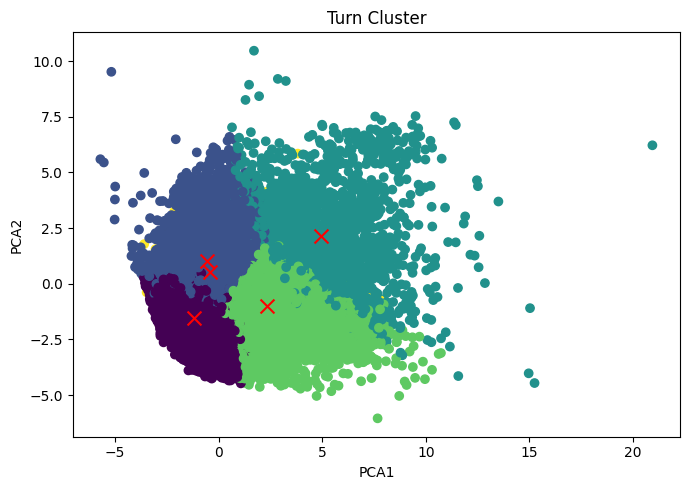

In [59]:
plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Turn Cluster')
plt.tight_layout()

In [60]:
df_v2.groupby('cluster').mean(numeric_only=True).T

cluster,0,1,2,3,4
is_ios,1.000000,1.000000,0.986775,1.000000,0.000000
eventType,4.541061,4.469208,4.611394,4.559637,4.529522
eventSampleSpeed,12.221783,12.534376,27.906955,26.443276,14.577203
eventDurationSeconds,2.685739,5.670151,14.028846,5.367371,4.981649
eventMilesDriven,0.011734,0.018949,0.102089,0.033897,0.018036
eventSensorDetectionMthd,0.095706,1.709135,1.560529,1.417406,1.287723
eventGPSSignalStrength,5.592097,5.468351,5.310712,5.600692,5.745149
eventStartSpeed,11.282105,12.071353,29.006582,27.159296,13.351300
eventEndSpeed,13.405271,14.442497,29.141881,27.028845,16.389969
memsMedianHorizontalNorm,1.977847,2.045845,1.471045,2.086504,1.832708


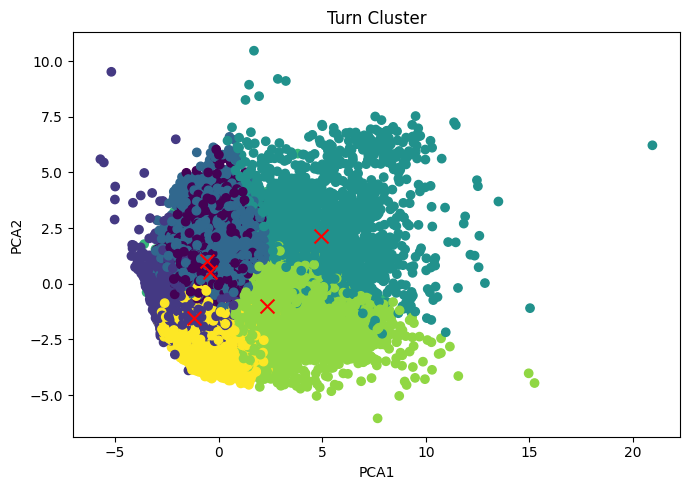

In [61]:
kmeans=KMeans(n_clusters=7)
kmeans.fit(X)

plt.figure(figsize=(7,5))

# Scatter plot
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'],c=kmeans.labels_)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=100,c='red')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('Turn Cluster')
plt.tight_layout()

In [62]:
df_v2.groupby('cluster').mean(numeric_only=True).T

cluster,0,1,2,3,4
is_ios,1.000000,1.000000,0.986775,1.000000,0.000000
eventType,4.541061,4.469208,4.611394,4.559637,4.529522
eventSampleSpeed,12.221783,12.534376,27.906955,26.443276,14.577203
eventDurationSeconds,2.685739,5.670151,14.028846,5.367371,4.981649
eventMilesDriven,0.011734,0.018949,0.102089,0.033897,0.018036
eventSensorDetectionMthd,0.095706,1.709135,1.560529,1.417406,1.287723
eventGPSSignalStrength,5.592097,5.468351,5.310712,5.600692,5.745149
eventStartSpeed,11.282105,12.071353,29.006582,27.159296,13.351300
eventEndSpeed,13.405271,14.442497,29.141881,27.028845,16.389969
memsMedianHorizontalNorm,1.977847,2.045845,1.471045,2.086504,1.832708


Index(['is_ios', 'eventType', 'eventSampleSpeed', 'eventDurationSeconds',
       'eventMilesDriven', 'eventSensorDetectionMthd',
       'eventGPSSignalStrength', 'eventStartSpeed', 'eventEndSpeed',
       'memsMedianHorizontalNorm', 'gyro_angular_change_per_second',
       'gyroAngleChange', 'mems_radius', 'cluster'],
      dtype='object')